In [7]:
import pandas as pd
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = 10

In [9]:
gdp = pd.read_csv('data/gdp.csv')
gdp['gdp'] = gdp['GDP (constant 2010 US$)'] / 1_000_000_000

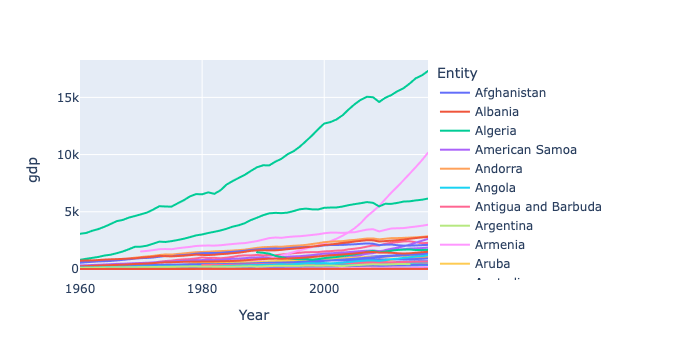

In [10]:
import plotly.express as px
px.line(gdp, x='Year', y='gdp', color='Entity')

In [13]:
pop = pd.read_csv('data/population.csv')
pop

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)"
0,Afghanistan,AFG,1800,3280000
1,Afghanistan,AFG,1801,3280000
2,Afghanistan,AFG,1802,3280000
3,Afghanistan,AFG,1803,3280000
4,Afghanistan,AFG,1804,3280000
...,...,...,...,...
46878,Zimbabwe,ZWE,2015,13815000
46879,Zimbabwe,ZWE,2016,14030000
46880,Zimbabwe,ZWE,2017,14237000
46881,Zimbabwe,ZWE,2018,14439000


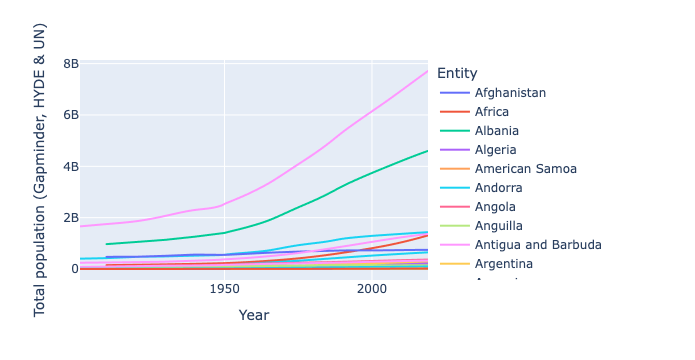

In [15]:
px.line(pop.query('Year > 1900'), x='Year', y='Total population (Gapminder, HYDE & UN)', color='Entity')

In [18]:
pop = pop.rename(columns={'Total population (Gapminder, HYDE & UN)': 'population'})

In [23]:
gdp2017 = gdp.query('Year == 2017')
pop2017 = pop.query('Year == 2017')

In [28]:
gdp_and_pop_2017 = pd.merge(left=gdp2017, right=pop2017, left_on='Entity', right_on='Entity', how='outer')
gdp_and_pop_2017['gdp_per_capita'] = gdp_and_pop_2017['GDP (constant 2010 US$)'] / gdp_and_pop_2017['population']
gdp_and_pop_2017

,Entity,Code_x,Year_x,GDP (constant 2010 US$),gdp,Code_y,Year_y,population,gdp_per_capita
0,Afghanistan,AFG,2017.0,2.196941e+10,21.969414,AFG,2017.0,3.629600e+07,605.284718
1,Africa,NaN,NaN,NaN,NaN,NaN,2017.0,1.244222e+09,NaN
2,Albania,ALB,2017.0,1.398856e+10,13.988556,ALB,2017.0,2.884000e+06,4850.400743
3,Algeria,DZA,2017.0,1.993674e+11,199.367414,DZA,2017.0,4.138900e+07,4816.917876
4,American Samoa,NaN,NaN,NaN,NaN,ASM,2017.0,5.600000e+04,NaN
...,...,...,...,...,...,...,...,...,...
238,Western Sahara,NaN,NaN,NaN,NaN,ESH,2017.0,5.530000e+05,NaN
239,World,NaN,NaN,NaN,NaN,OWID_WRL,2017.0,7.547859e+09,NaN
240,Yemen,NaN,NaN,NaN,NaN,YEM,2017.0,2.783500e+07,NaN
241,Zambia,ZMB,2017.0,2.813940e+10,28.139397,ZMB,2017.0,1.685400e+07,1669.597527


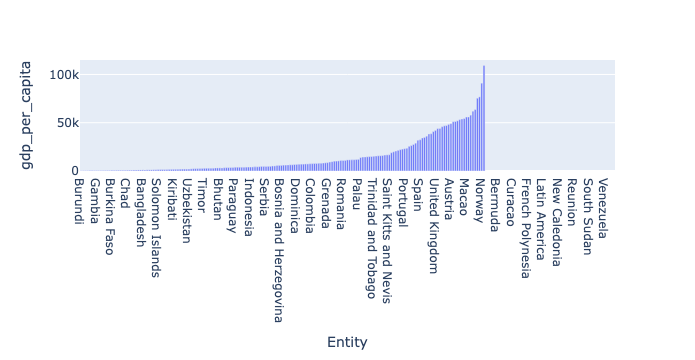

In [29]:
px.bar(gdp_and_pop_2017.sort_values('gdp_per_capita'), x='Entity', y='gdp_per_capita')

In [30]:
gdp_and_pop = pd.merge(left=gdp, right=pop, left_on='Entity', right_on='Entity', how='inner')
gdp_and_pop

,Entity,Code_x,Year_x,GDP (constant 2010 US$),gdp,Code_y,Year_y,population
0,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1800,3280000
1,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1801,3280000
2,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1802,3280000
3,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1803,3280000
4,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1804,3280000
...,...,...,...,...,...,...,...,...
1904165,Zimbabwe,ZWE,2017,1.532981e+10,15.329811,ZWE,2015,13815000
1904166,Zimbabwe,ZWE,2017,1.532981e+10,15.329811,ZWE,2016,14030000
1904167,Zimbabwe,ZWE,2017,1.532981e+10,15.329811,ZWE,2017,14237000
1904168,Zimbabwe,ZWE,2017,1.532981e+10,15.329811,ZWE,2018,14439000


In [32]:
gdp_and_pop.query('Entity == "Afghanistan"')

,Entity,Code_x,Year_x,GDP (constant 2010 US$),gdp,Code_y,Year_y,population
0,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1800,3280000
1,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1801,3280000
2,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1802,3280000
3,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1803,3280000
4,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,1804,3280000
...,...,...,...,...,...,...,...,...
3515,Afghanistan,AFG,2017,2.196941e+10,21.969414,AFG,2015,34414000
3516,Afghanistan,AFG,2017,2.196941e+10,21.969414,AFG,2016,35383000
3517,Afghanistan,AFG,2017,2.196941e+10,21.969414,AFG,2017,36296000
3518,Afghanistan,AFG,2017,2.196941e+10,21.969414,AFG,2018,37172000


In [38]:
gdp_and_pop = pd.merge(left=gdp, right=pop, left_on=['Entity', 'Year'], right_on=['Entity', 'Year'], how='left')

In [39]:
gdp_and_pop['gdp_per_capita'] = gdp_and_pop['GDP (constant 2010 US$)'] / gdp_and_pop['population']
gdp_and_pop

,Entity,Code_x,Year,GDP (constant 2010 US$),gdp,Code_y,population,gdp_per_capita
0,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,22601000.0,354.552149
1,Afghanistan,AFG,2003,8.689884e+09,8.689884,AFG,23681000.0,366.955940
2,Afghanistan,AFG,2004,8.781610e+09,8.781610,AFG,24727000.0,355.142564
3,Afghanistan,AFG,2005,9.762979e+09,9.762979,AFG,25654000.0,380.563610
4,Afghanistan,AFG,2006,1.030523e+10,10.305228,AFG,26433000.0,389.862222
...,...,...,...,...,...,...,...,...
8864,Zimbabwe,ZWE,2013,1.418193e+10,14.181927,ZWE,13350000.0,1062.316603
8865,Zimbabwe,ZWE,2014,1.448359e+10,14.483588,ZWE,13587000.0,1065.988675
8866,Zimbabwe,ZWE,2015,1.472830e+10,14.728302,ZWE,13815000.0,1066.109450
8867,Zimbabwe,ZWE,2016,1.481899e+10,14.818986,ZWE,14030000.0,1056.235654


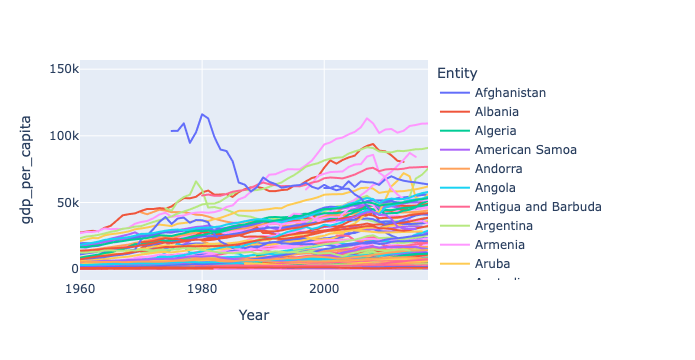

In [43]:
px.line(gdp_and_pop, x='Year', y='gdp_per_capita', color='Entity')

In [44]:
gdp_and_pop_by_entity = gdp_and_pop.set_index('Entity')
gdp_and_pop_by_entity

,Code_x,Year,GDP (constant 2010 US$),gdp,Code_y,population,gdp_per_capita
Entity,,,,,,,
Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,22601000.0,354.552149
Afghanistan,AFG,2003,8.689884e+09,8.689884,AFG,23681000.0,366.955940
Afghanistan,AFG,2004,8.781610e+09,8.781610,AFG,24727000.0,355.142564
Afghanistan,AFG,2005,9.762979e+09,9.762979,AFG,25654000.0,380.563610
Afghanistan,AFG,2006,1.030523e+10,10.305228,AFG,26433000.0,389.862222
...,...,...,...,...,...,...,...
Zimbabwe,ZWE,2013,1.418193e+10,14.181927,ZWE,13350000.0,1062.316603
Zimbabwe,ZWE,2014,1.448359e+10,14.483588,ZWE,13587000.0,1065.988675
Zimbabwe,ZWE,2015,1.472830e+10,14.728302,ZWE,13815000.0,1066.109450


In [46]:
gdp_per_capitas_1960 = gdp_and_pop_by_entity.query('Year == 1960')[['gdp_per_capita']]
gdp_per_capitas_1960

,gdp_per_capita
Entity,
Algeria,2480.954892
Argentina,5642.704253
Australia,19452.581069
Austria,12987.795692
Bahamas,17659.437251
...,...
United States,16484.868935
Uruguay,5473.869009
Venezuela,12456.963693


In [55]:
gdp_and_pop_by_entity['gdp_per_cap_ratio'] = gdp_and_pop_by_entity['gdp_per_capita'] / gdp_per_capitas_1960['gdp_per_capita']
gdp_and_pop_by_entity

,Code_x,Year,GDP (constant 2010 US$),gdp,Code_y,population,gdp_per_capita,gdp_per_capita_ratio,gdp_per_cap_ratio
Entity,,,,,,,,,
Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,22601000.0,354.552149,NaN,NaN
Afghanistan,AFG,2003,8.689884e+09,8.689884,AFG,23681000.0,366.955940,NaN,NaN
Afghanistan,AFG,2004,8.781610e+09,8.781610,AFG,24727000.0,355.142564,NaN,NaN
Afghanistan,AFG,2005,9.762979e+09,9.762979,AFG,25654000.0,380.563610,NaN,NaN
Afghanistan,AFG,2006,1.030523e+10,10.305228,AFG,26433000.0,389.862222,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,2013,1.418193e+10,14.181927,ZWE,13350000.0,1062.316603,1.192968,1.192968
Zimbabwe,ZWE,2014,1.448359e+10,14.483588,ZWE,13587000.0,1065.988675,1.197091,1.197091
Zimbabwe,ZWE,2015,1.472830e+10,14.728302,ZWE,13815000.0,1066.109450,1.197227,1.197227


In [56]:
gdp_and_pop = gdp_and_pop_by_entity.reset_index()
gdp_and_pop

,Entity,Code_x,Year,GDP (constant 2010 US$),gdp,Code_y,population,gdp_per_capita,gdp_per_capita_ratio,gdp_per_cap_ratio
0,Afghanistan,AFG,2002,8.013233e+09,8.013233,AFG,22601000.0,354.552149,NaN,NaN
1,Afghanistan,AFG,2003,8.689884e+09,8.689884,AFG,23681000.0,366.955940,NaN,NaN
2,Afghanistan,AFG,2004,8.781610e+09,8.781610,AFG,24727000.0,355.142564,NaN,NaN
3,Afghanistan,AFG,2005,9.762979e+09,9.762979,AFG,25654000.0,380.563610,NaN,NaN
4,Afghanistan,AFG,2006,1.030523e+10,10.305228,AFG,26433000.0,389.862222,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8864,Zimbabwe,ZWE,2013,1.418193e+10,14.181927,ZWE,13350000.0,1062.316603,1.192968,1.192968
8865,Zimbabwe,ZWE,2014,1.448359e+10,14.483588,ZWE,13587000.0,1065.988675,1.197091,1.197091
8866,Zimbabwe,ZWE,2015,1.472830e+10,14.728302,ZWE,13815000.0,1066.109450,1.197227,1.197227
8867,Zimbabwe,ZWE,2016,1.481899e+10,14.818986,ZWE,14030000.0,1056.235654,1.186139,1.186139


In [57]:
gdp_per_cap_ratio_history = gdp_and_pop.dropna()
gdp_per_cap_ratio_history

,Entity,Code_x,Year,GDP (constant 2010 US$),gdp,Code_y,population,gdp_per_capita,gdp_per_capita_ratio,gdp_per_cap_ratio
54,Algeria,DZA,1960,2.743440e+10,27.434399,DZA,11058000.0,2480.954892,1.000000,1.000000
55,Algeria,DZA,1961,2.370183e+10,23.701828,DZA,11336000.0,2090.845811,0.842758,0.842758
56,Algeria,DZA,1962,1.903611e+10,19.036113,DZA,11620000.0,1638.219736,0.660318,0.660318
57,Algeria,DZA,1963,2.556811e+10,25.568114,DZA,11913000.0,2146.236350,0.865085,0.865085
58,Algeria,DZA,1964,2.706114e+10,27.061141,DZA,12222000.0,2214.133643,0.892452,0.892452
...,...,...,...,...,...,...,...,...,...,...
8864,Zimbabwe,ZWE,2013,1.418193e+10,14.181927,ZWE,13350000.0,1062.316603,1.192968,1.192968
8865,Zimbabwe,ZWE,2014,1.448359e+10,14.483588,ZWE,13587000.0,1065.988675,1.197091,1.197091
8866,Zimbabwe,ZWE,2015,1.472830e+10,14.728302,ZWE,13815000.0,1066.109450,1.197227,1.197227
8867,Zimbabwe,ZWE,2016,1.481899e+10,14.818986,ZWE,14030000.0,1056.235654,1.186139,1.186139


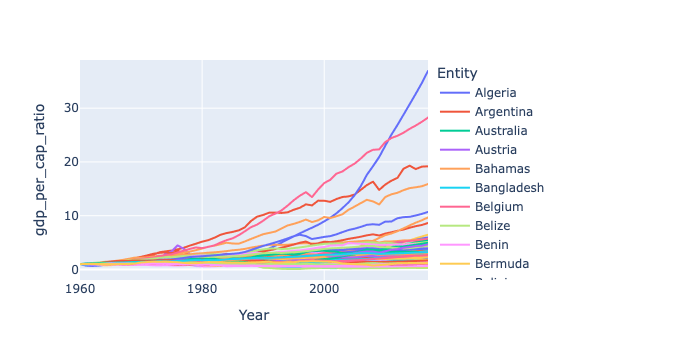

In [58]:
px.line(gdp_per_cap_ratio_history, x='Year', y='gdp_per_cap_ratio', color='Entity')

In [64]:
gpd_and_pop_by_entity = gdp_per_cap_ratio_history.set_index('Entity')
gpd_and_pop_by_entity['pop_ratio'] = gpd_and_pop_by_entity['population'] / gpd_and_pop_by_entity.query('Year == 1960')['population']
gpd_and_pop_by_entity['gdp_ratio'] = gpd_and_pop_by_entity['gdp'] / gpd_and_pop_by_entity.query('Year == 1960')['gdp']
gpd_and_pop = gpd_and_pop_by_entity.reset_index()
gpd_and_pop

,Entity,Code_x,Year,GDP (constant 2010 US$),gdp,Code_y,population,gdp_per_capita,gdp_per_capita_ratio,gdp_per_cap_ratio,pop_ratio,gdp_ratio
0,Algeria,DZA,1960,2.743440e+10,27.434399,DZA,11058000.0,2480.954892,1.000000,1.000000,1.000000,1.000000
1,Algeria,DZA,1961,2.370183e+10,23.701828,DZA,11336000.0,2090.845811,0.842758,0.842758,1.025140,0.863946
2,Algeria,DZA,1962,1.903611e+10,19.036113,DZA,11620000.0,1638.219736,0.660318,0.660318,1.050823,0.693878
3,Algeria,DZA,1963,2.556811e+10,25.568114,DZA,11913000.0,2146.236350,0.865085,0.865085,1.077320,0.931973
4,Algeria,DZA,1964,2.706114e+10,27.061141,DZA,12222000.0,2214.133643,0.892452,0.892452,1.105263,0.986395
...,...,...,...,...,...,...,...,...,...,...,...,...
5207,Zimbabwe,ZWE,2013,1.418193e+10,14.181927,ZWE,13350000.0,1062.316603,1.192968,1.192968,3.534551,4.216605
5208,Zimbabwe,ZWE,2014,1.448359e+10,14.483588,ZWE,13587000.0,1065.988675,1.197091,1.197091,3.597299,4.306296
5209,Zimbabwe,ZWE,2015,1.472830e+10,14.728302,ZWE,13815000.0,1066.109450,1.197227,1.197227,3.657665,4.379055
5210,Zimbabwe,ZWE,2016,1.481899e+10,14.818986,ZWE,14030000.0,1056.235654,1.186139,1.186139,3.714588,4.406017


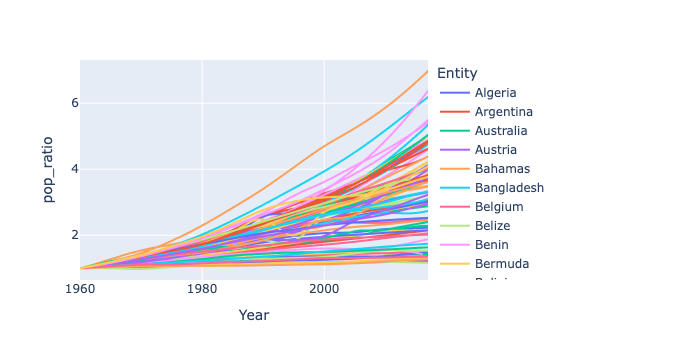

In [65]:
px.line(gpd_and_pop, x='Year', y='pop_ratio', color='Entity')

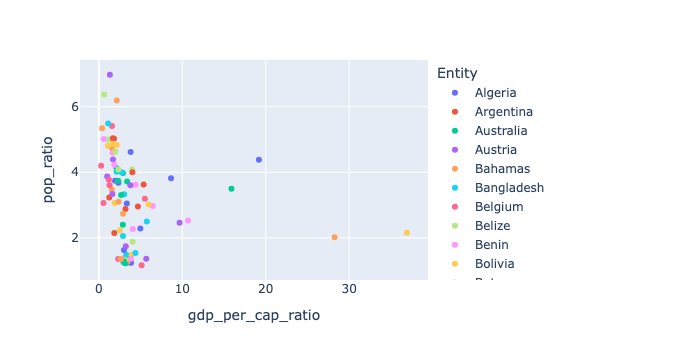

In [66]:
px.scatter(gpd_and_pop.query('Year == 2017'), x='gdp_per_cap_ratio', y='pop_ratio', color='Entity')

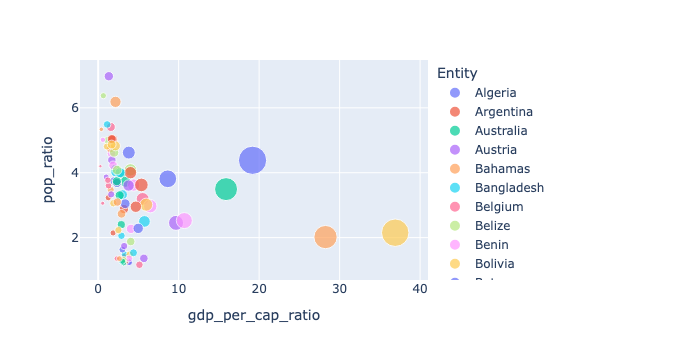

In [67]:
px.scatter(gpd_and_pop.query('Year == 2017'), x='gdp_per_cap_ratio', y='pop_ratio', color='Entity', size='gdp_ratio')

In [70]:
life_exp = pd.read_csv('data/life_expectancy.csv')
life_exp

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350
...,...,...,...,...
18440,Zimbabwe,ZWE,2015,59.534
18441,Zimbabwe,ZWE,2016,60.294
18442,Zimbabwe,ZWE,2017,60.812
18443,Zimbabwe,ZWE,2018,61.195


In [73]:
life_exp = life_exp[['Entity', 'Year', 'Life expectancy']]
life_exp

,Entity,Year,Life expectancy
0,Afghanistan,1950,27.638
1,Afghanistan,1951,27.878
2,Afghanistan,1952,28.361
3,Afghanistan,1953,28.852
4,Afghanistan,1954,29.350
...,...,...,...
18440,Zimbabwe,2015,59.534
18441,Zimbabwe,2016,60.294
18442,Zimbabwe,2017,60.812
18443,Zimbabwe,2018,61.195


In [88]:
gdp_pop_le = pd.merge(left=gdp_and_pop.dropna(), right=life_exp, on=['Entity', 'Year'], how='left')
gdp_pop_le

,Entity,Code_x,Year,GDP (constant 2010 US$),gdp,Code_y,population,gdp_per_capita,gdp_per_capita_ratio,gdp_per_cap_ratio,Life expectancy
0,Algeria,DZA,1960,2.743440e+10,27.434399,DZA,11058000.0,2480.954892,1.000000,1.000000,46.141
1,Algeria,DZA,1961,2.370183e+10,23.701828,DZA,11336000.0,2090.845811,0.842758,0.842758,46.599
2,Algeria,DZA,1962,1.903611e+10,19.036113,DZA,11620000.0,1638.219736,0.660318,0.660318,47.056
3,Algeria,DZA,1963,2.556811e+10,25.568114,DZA,11913000.0,2146.236350,0.865085,0.865085,47.509
4,Algeria,DZA,1964,2.706114e+10,27.061141,DZA,12222000.0,2214.133643,0.892452,0.892452,47.958
...,...,...,...,...,...,...,...,...,...,...,...
5207,Zimbabwe,ZWE,2013,1.418193e+10,14.181927,ZWE,13350000.0,1062.316603,1.192968,1.192968,56.897
5208,Zimbabwe,ZWE,2014,1.448359e+10,14.483588,ZWE,13587000.0,1065.988675,1.197091,1.197091,58.410
5209,Zimbabwe,ZWE,2015,1.472830e+10,14.728302,ZWE,13815000.0,1066.109450,1.197227,1.197227,59.534
5210,Zimbabwe,ZWE,2016,1.481899e+10,14.818986,ZWE,14030000.0,1056.235654,1.186139,1.186139,60.294


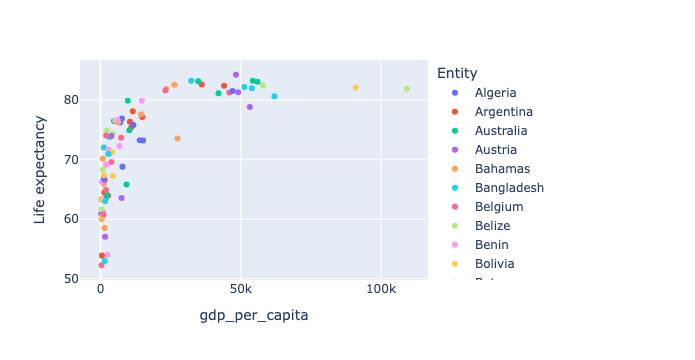

In [91]:
px.scatter(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', color='Entity')

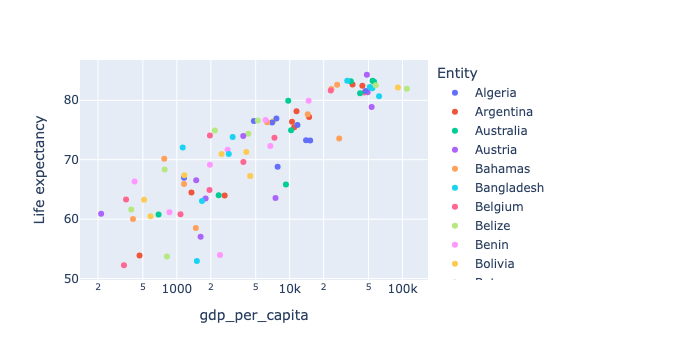

In [92]:
px.scatter(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', color='Entity', log_x=True)

In [97]:
gdp_pop_le_by_entity = gdp_pop_le.set_index('Entity')
gdp_pop_le_by_entity['life_exp_ratio'] = gdp_pop_le_by_entity['Life expectancy'] / gdp_pop_le_by_entity.query('Year == 1960')['Life expectancy']
gdp_pop_le = gdp_pop_le_by_entity.reset_index()
gdp_pop_le

,Entity,Code_x,Year,GDP (constant 2010 US$),gdp,Code_y,population,gdp_per_capita,gdp_per_capita_ratio,gdp_per_cap_ratio,Life expectancy,life_exp_ratio
0,Algeria,DZA,1960,2.743440e+10,27.434399,DZA,11058000.0,2480.954892,1.000000,1.000000,46.141,1.000000
1,Algeria,DZA,1961,2.370183e+10,23.701828,DZA,11336000.0,2090.845811,0.842758,0.842758,46.599,1.009926
2,Algeria,DZA,1962,1.903611e+10,19.036113,DZA,11620000.0,1638.219736,0.660318,0.660318,47.056,1.019831
3,Algeria,DZA,1963,2.556811e+10,25.568114,DZA,11913000.0,2146.236350,0.865085,0.865085,47.509,1.029648
4,Algeria,DZA,1964,2.706114e+10,27.061141,DZA,12222000.0,2214.133643,0.892452,0.892452,47.958,1.039379
...,...,...,...,...,...,...,...,...,...,...,...,...
5207,Zimbabwe,ZWE,2013,1.418193e+10,14.181927,ZWE,13350000.0,1062.316603,1.192968,1.192968,56.897,1.073144
5208,Zimbabwe,ZWE,2014,1.448359e+10,14.483588,ZWE,13587000.0,1065.988675,1.197091,1.197091,58.410,1.101681
5209,Zimbabwe,ZWE,2015,1.472830e+10,14.728302,ZWE,13815000.0,1066.109450,1.197227,1.197227,59.534,1.122880
5210,Zimbabwe,ZWE,2016,1.481899e+10,14.818986,ZWE,14030000.0,1056.235654,1.186139,1.186139,60.294,1.137215


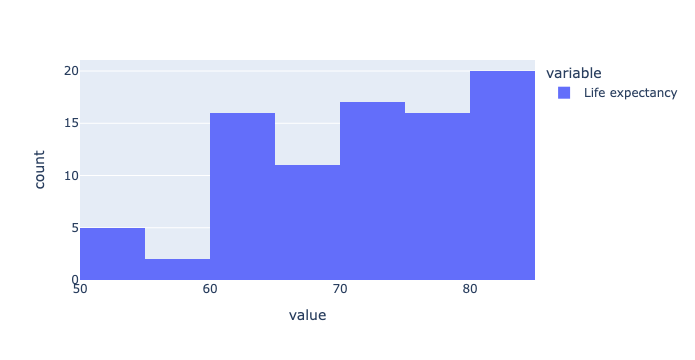

In [99]:
px.histogram(gdp_pop_le.query('Year == 2017')['Life expectancy'])

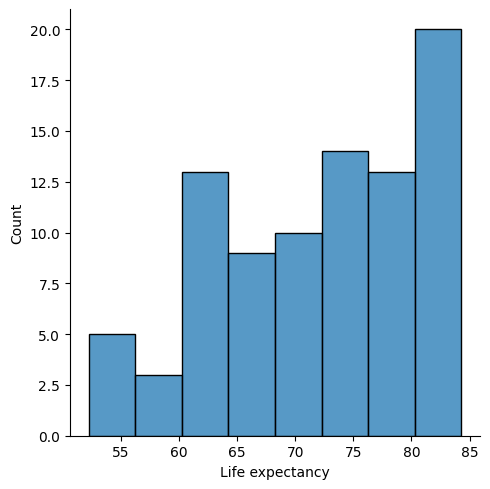

In [100]:
sns.displot(gdp_pop_le.query('Year == 2017')['Life expectancy'])

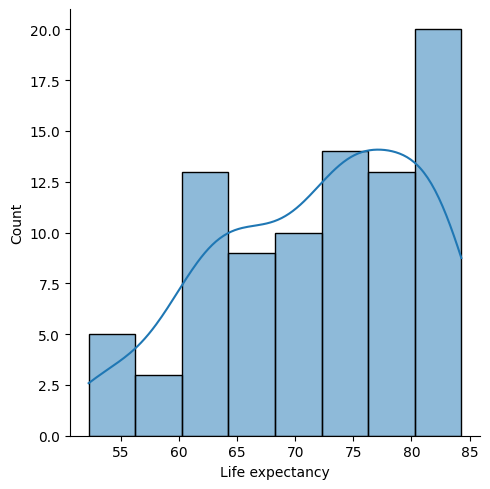

In [102]:
sns.displot(gdp_pop_le.query('Year == 2017')['Life expectancy'], kde=True)

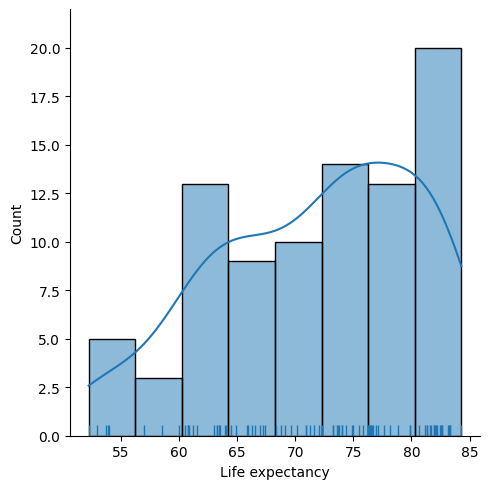

In [103]:
sns.displot(gdp_pop_le.query('Year == 2017')['Life expectancy'], kde=True, rug=True)

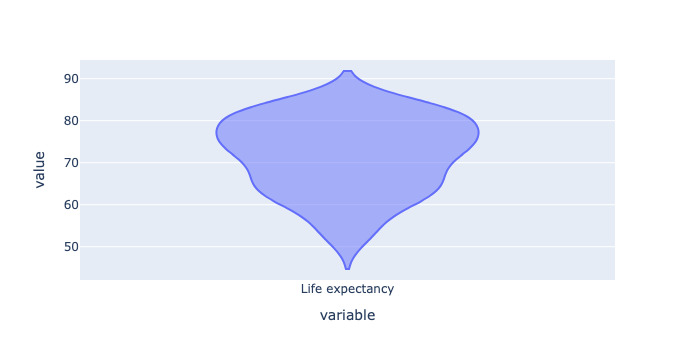

In [104]:
px.violin(gdp_pop_le.query('Year == 2017')['Life expectancy'])

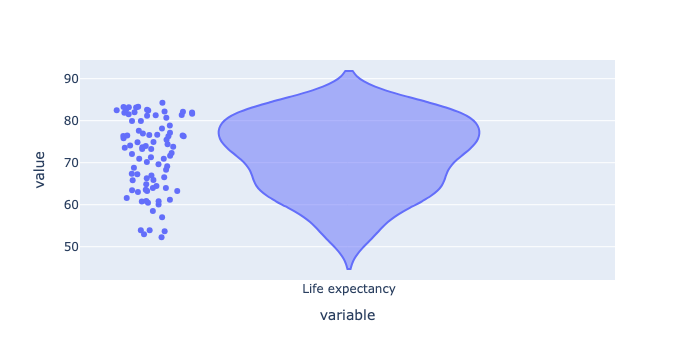

In [105]:
px.violin(gdp_pop_le.query('Year == 2017')['Life expectancy'], points='all')

In [106]:
continents = pd.read_csv('data/continents.csv')
continents

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
197,Paraguay,South America
198,Peru,South America
199,Suriname,South America
200,Uruguay,South America


In [110]:
gdp_pop_le = pd.merge(left=gdp_pop_le, right=continents, left_on='Entity', right_on='Country', how='left')
gdp_pop_le

,Entity,Code_x,Year,GDP (constant 2010 US$),gdp,Code_y,population,gdp_per_capita,gdp_per_capita_ratio,gdp_per_cap_ratio,Life expectancy,life_exp_ratio,Country,Continent
0,Algeria,DZA,1960,2.743440e+10,27.434399,DZA,11058000.0,2480.954892,1.000000,1.000000,46.141,1.000000,Algeria,Africa
1,Algeria,DZA,1961,2.370183e+10,23.701828,DZA,11336000.0,2090.845811,0.842758,0.842758,46.599,1.009926,Algeria,Africa
2,Algeria,DZA,1962,1.903611e+10,19.036113,DZA,11620000.0,1638.219736,0.660318,0.660318,47.056,1.019831,Algeria,Africa
3,Algeria,DZA,1963,2.556811e+10,25.568114,DZA,11913000.0,2146.236350,0.865085,0.865085,47.509,1.029648,Algeria,Africa
4,Algeria,DZA,1964,2.706114e+10,27.061141,DZA,12222000.0,2214.133643,0.892452,0.892452,47.958,1.039379,Algeria,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,Zimbabwe,ZWE,2013,1.418193e+10,14.181927,ZWE,13350000.0,1062.316603,1.192968,1.192968,56.897,1.073144,Zimbabwe,Africa
5266,Zimbabwe,ZWE,2014,1.448359e+10,14.483588,ZWE,13587000.0,1065.988675,1.197091,1.197091,58.410,1.101681,Zimbabwe,Africa
5267,Zimbabwe,ZWE,2015,1.472830e+10,14.728302,ZWE,13815000.0,1066.109450,1.197227,1.197227,59.534,1.122880,Zimbabwe,Africa
5268,Zimbabwe,ZWE,2016,1.481899e+10,14.818986,ZWE,14030000.0,1056.235654,1.186139,1.186139,60.294,1.137215,Zimbabwe,Africa


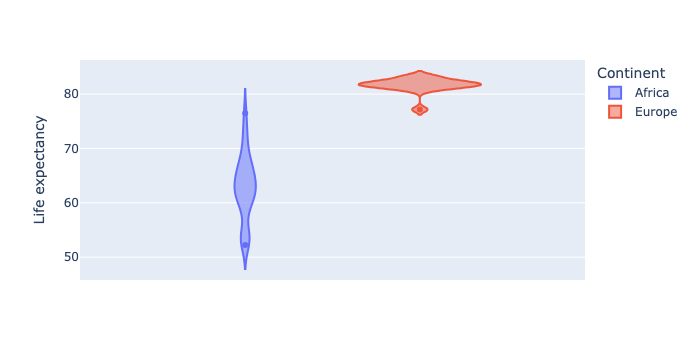

In [115]:
continents = ['Africa', 'Europe']
px.violin(gdp_pop_le.query('Year == 2017 and Continent in @continents').dropna(), y='Life expectancy', color='Continent')

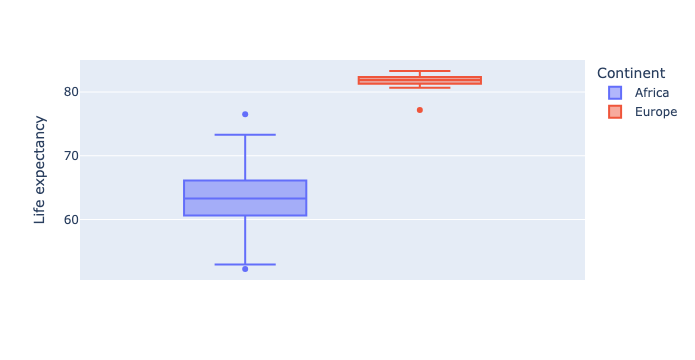

In [116]:
px.box(gdp_pop_le.query('Year == 2017 and Continent in @continents').dropna(), y='Life expectancy', color='Continent')

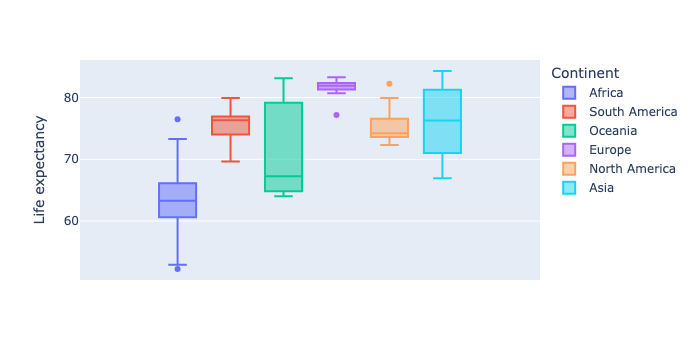

In [118]:
px.box(gdp_pop_le.query('Year == 2017').dropna(), y='Life expectancy', color='Continent')

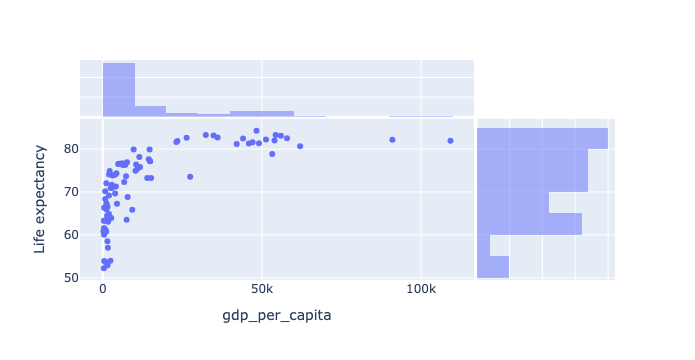

In [122]:
px.scatter(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', marginal_y='histogram', marginal_x='histogram')

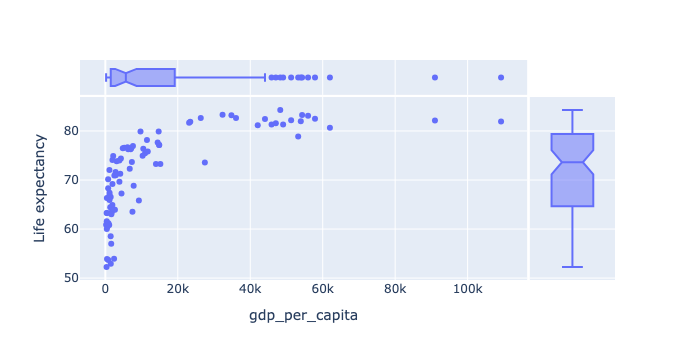

In [123]:
px.scatter(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', marginal_y='box', marginal_x='box')

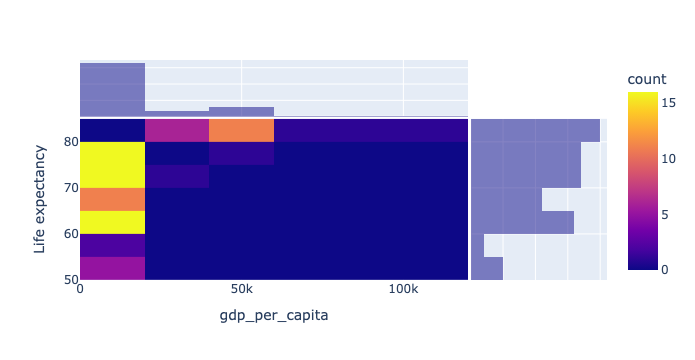

In [126]:
px.density_heatmap(gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', marginal_y='histogram', marginal_x='histogram')

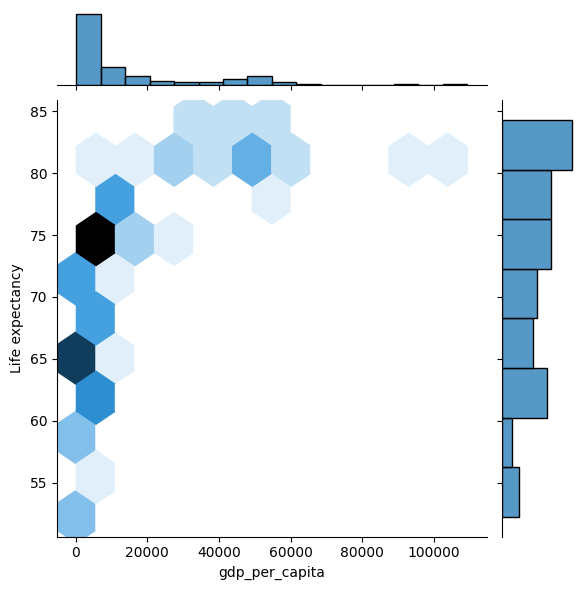

In [127]:
sns.jointplot(data=gdp_pop_le.query('Year == 2017'), x='gdp_per_capita', y='Life expectancy', kind='hex')